In [83]:
import pandas as pd
import pandas_datareader.data as web
import pytz
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import datetime

start = datetime.datetime(2018, 3, 12)
end = datetime.datetime(2018, 4, 8)

In [94]:
def norm_twt(x):
    return 5*x

In [93]:
def download_stocks(company, start, end):
    data = pd.DataFrame()
    data = web.DataReader(company, 'morningstar', start, end)
    data['Close difference'] = data['Close'].diff()
    data['Close difference'] = data['Close difference'].fillna(0)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data['Close difference'].values.reshape(-1,1))
    data['Difference norm'] = data['Close difference'].map(lambda x: scaler.transform(x)[0][0])
    return data

In [49]:
def remove_weekends(ls):
    wk = np.delete(ls, np.s_[::5])
    wk = np.delete(ls, np.s_[::5])
    return wk

In [97]:
twt = pd.read_csv('tweets_30day_polarity.csv', error_bad_lines=False)
twt = twt.fillna(0)
twt = twt.applymap(norm_twt)
twt.head()

Company    Apr 08    Apr 07  \
0                          AppleAppleAppleAppleApple  0.602606  0.313283   
1                          TeslaTeslaTeslaTeslaTesla  0.557546 -0.024062   
2  Goldman SachsGoldman SachsGoldman SachsGoldman...  0.241414  0.028168   
3  British PetroleumBritish PetroleumBritish Petr...  0.546554  0.379111   

     Apr 06    Apr 05    Apr 04    Apr 03    Apr 02    Apr 01    Mar 31  \
0  0.435400  0.310217  0.612230  0.379209  0.011540  0.515751  0.447668   
1 -0.141113  0.246562  0.352305  0.346709  0.124451 -0.083991  0.339742   
2  0.406970  0.623080  0.316901 -0.002742  0.556541 -0.124549  0.074586   
3  0.390400  1.008186  0.581854  0.036397  1.116054  0.530310  0.607970   

     ...       Mar 21    Mar 20    Mar 19    Mar 18    Mar 17    Mar 16  \
0    ...     0.738224  1.301364  0.708815  0.320377  0.917085  0.181523   
1    ...     0.383219  0.273648  0.199562  0.509812  0.336523  0.153472   
2    ...     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    ...     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     Mar 15    Mar 14    Mar 13    Mar 12  
0  0.407287  0.336349  0.265670  0.000000  
1  0.057193  0.593521  0.490667  0.526042  
2  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  

[4 rows x 29 columns]

In [84]:
tsla = download_stocks('TSLA', start, end)
tsla

Close      High       Low    Open    Volume  \
Symbol Date                                                       
TSLA   2018-03-12  345.51  347.2100  326.5000  328.61   8264035   
       2018-03-13  341.84  345.1200  336.2635  344.92   5965805   
       2018-03-14  326.63  339.8100  323.9300  336.76   7967370   
       2018-03-15  325.60  332.8500  321.1000  329.38   6564801   
       2018-03-16  321.35  327.4000  319.0700  325.96   6117279   
       2018-03-19  313.56  320.7500  309.6700  316.50   7484294   
       2018-03-20  310.55  316.2500  308.7600  314.87   4764293   
       2018-03-21  316.53  322.4400  310.1900  310.25   5958411   
       2018-03-22  309.10  318.8200  308.1800  313.89   4939771   
       2018-03-23  301.54  311.6100  300.4500  311.25   6654899   
       2018-03-26  304.18  307.5900  291.3600  307.34   8375175   
       2018-03-27  279.18  304.2700  277.1800  304.00  13872029   
       2018-03-28  257.78  268.6800  252.1000  264.58  21001437   
       2018-03-29  266.13  270.9599  248.2100  256.49  15170749   
       2018-03-30  266.13  266.1300  266.1300  266.13         0   
       2018-04-02  252.48  260.3318  244.5901  256.26  16113968   
       2018-04-03  267.53  273.3500  254.4900  269.82  18844384   
       2018-04-04  286.94  288.3700  252.0000  252.78  19896746   
       2018-04-05  305.72  306.2600  288.2000  289.34  19121101   
       2018-04-06  299.30  309.2800  295.5000  301.00  13520286   

                   Close difference  Difference norm  
Symbol Date                                           
TSLA   2018-03-12              0.00         0.125873  
       2018-03-13             -3.67        -0.039406  
       2018-03-14            -15.21        -0.559108  
       2018-03-15             -1.03         0.079487  
       2018-03-16             -4.25        -0.065526  
       2018-03-19             -7.79        -0.224949  
       2018-03-20             -3.01        -0.009683  
       2018-03-21              5.98         0.395181  
       2018-03-22             -7.43        -0.208737  
       2018-03-23             -7.56        -0.214591  
       2018-03-26              2.64         0.244765  
       2018-03-27            -25.00        -1.000000  
       2018-03-28            -21.40        -0.837874  
       2018-03-29              8.35         0.501914  
       2018-03-30              0.00         0.125873  
       2018-04-02            -13.65        -0.488854  
       2018-04-03             15.05         0.803648  
       2018-04-04             19.41         1.000000  
       2018-04-05             18.78         0.971628  
       2018-04-06             -6.42        -0.163252

In [98]:
tsla_twt = twt.iloc[1].values[1:][::-1]
tsla_twt = remove_weekends(tsla_twt)
tsla_twt

array([0.49066709000000008, 0.59352136500000008, 0.057193319999999999,
       0.15347221999999999, 0.50981182999999997, 0.19956202499999998,
       0.27364844500000002, 0.38321900999999997, 0.22784504,
       0.16568497500000001, 0.19293589999999999, 0.59888360500000004,
       0.345851835, 0.31856446000000005, 0.45616292000000003,
       0.33974160499999995, 0.124450905, 0.34670918500000003,
       0.35230507999999999, 0.24656202999999999, -0.024062205,
       0.55754595499999993], dtype=object)

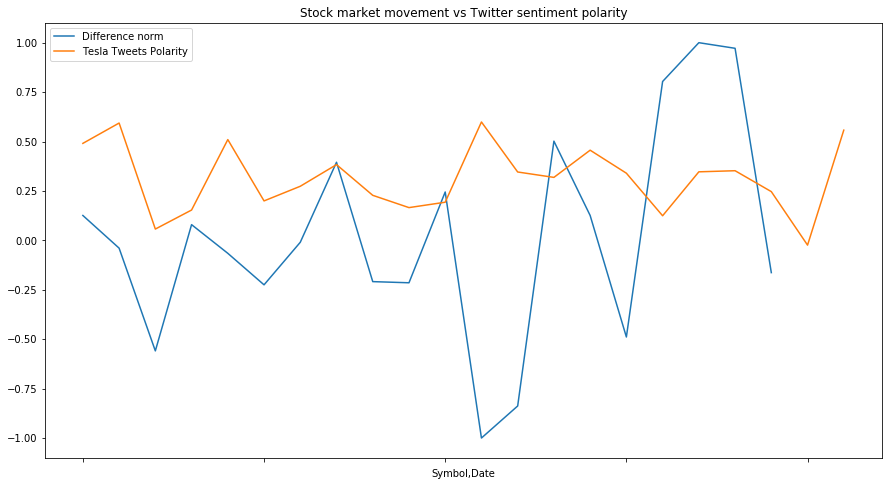

In [99]:
ax = tsla['Difference norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter sentiment polarity')
ax.plot(tsla_twt, label='Tesla Tweets Polarity')
ax.legend()

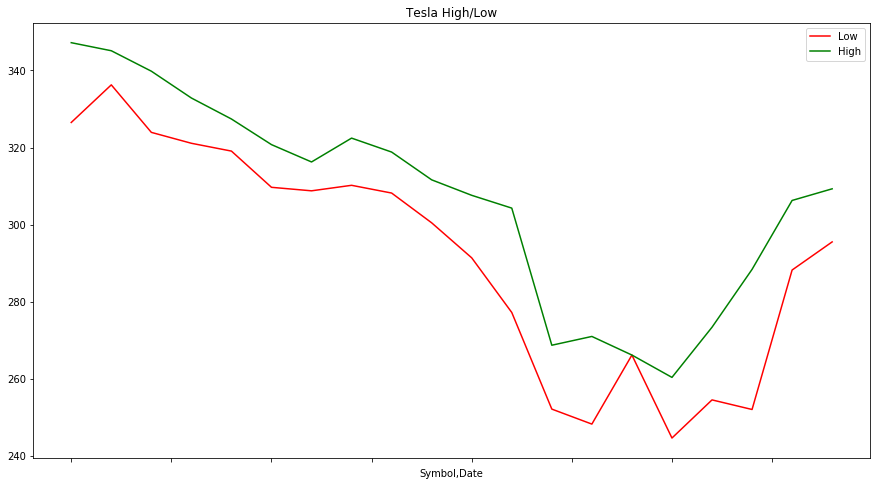

In [53]:
ax = tsla['Low'].plot(figsize=(15,8), title='Tesla High/Low', legend=True, color='red')
tsla['High'].plot(ax=ax, legend=True, color='Green')

In [87]:
aapl = download_stocks('AAPL', start, end)
aapl.head()

Close    High       Low    Open    Volume  \
Symbol Date                                                     
AAPL   2018-03-12  181.72  182.39  180.2100  180.29  32207081   
       2018-03-13  179.97  183.50  179.2400  182.59  31693529   
       2018-03-14  178.44  180.52  177.8100  180.32  29368356   
       2018-03-15  178.65  180.24  178.0701  178.50  22743798   
       2018-03-16  178.02  179.12  177.6200  178.65  39404688   

                   Close difference  Difference norm  
Symbol Date                                           
AAPL   2018-03-12              0.00        -0.277325  
       2018-03-13             -1.75        -0.562806  
       2018-03-14             -1.53        -0.526917  
       2018-03-15              0.21        -0.243067  
       2018-03-16             -0.63        -0.380098

In [100]:
aapl_twt = twt.iloc[0].values[1:][::-1]
aapl_twt = remove_weekends(aapl_twt)
aapl_twt

array([0.26567009500000005, 0.33634941000000002, 0.40728699000000002,
       0.1815232, 0.32037706499999996, 0.70881538499999996,
       1.3013644099999999, 0.73822435000000008, -0.076003084999999998,
       0.23719462499999999, 0.525503045, 0.63899739499999997,
       0.22816468499999998, 0.36959366500000002, 0.38563188500000001,
       0.44766798499999993, 0.011539689999999998, 0.37920875500000001,
       0.61223025500000006, 0.31021739500000001, 0.31328309999999998,
       0.60260566999999998], dtype=object)

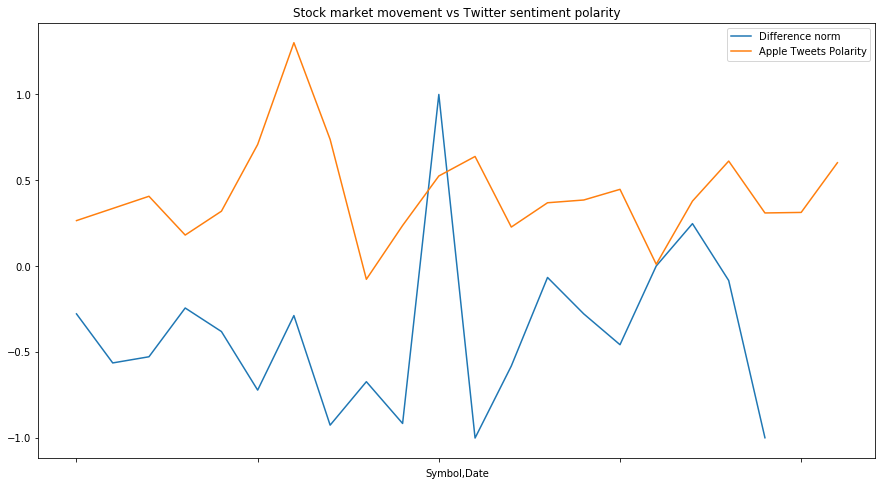

In [101]:
ax = aapl['Difference norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter sentiment polarity')
ax.plot(aapl_twt, label='Apple Tweets Polarity')
ax.legend()

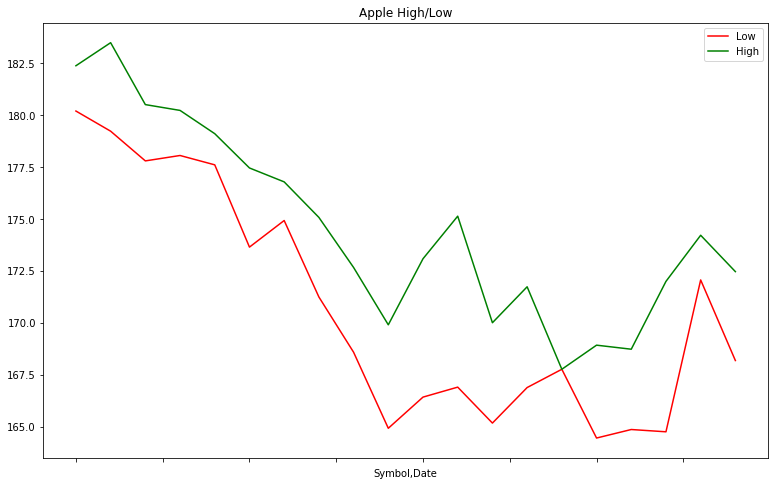

In [60]:
ax = aapl['Low'].plot(figsize=(13,8), title='Apple High/Low', legend=True, color='red')
aapl['High'].plot(ax=ax, legend=True, color='Green')

In [89]:
bp = download_stocks('BP', start, end)
bp.head()

Close    High    Low   Open   Volume  Close difference  \
Symbol Date                                                                 
BP     2018-03-12  39.85  39.880  39.58  39.68  3706000              0.00   
       2018-03-13  39.55  40.200  39.46  40.08  3517855             -0.30   
       2018-03-14  38.87  39.490  38.81  39.44  6302722             -0.68   
       2018-03-15  39.03  39.140  38.75  38.92  3976380              0.16   
       2018-03-16  39.48  39.615  39.07  39.11  4596504              0.45   

                   Difference norm  
Symbol Date                         
BP     2018-03-12        -0.083333  
       2018-03-13        -0.333333  
       2018-03-14        -0.650000  
       2018-03-15         0.050000  
       2018-03-16         0.291667

In [102]:
bp_twt = twt.iloc[3].values[1:][::-1]
bp_twt = remove_weekends(bp_twt)
bp_twt

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.45230992999999997, 0.30729166499999999, 0.73307359500000002,
       -0.41453682999999997, 0.304484955, 0.60796957500000004,
       1.1160538899999999, 0.036396940000000003, 0.58185392499999999,
       1.0081864550000001, 0.37911105, 0.546553705], dtype=object)

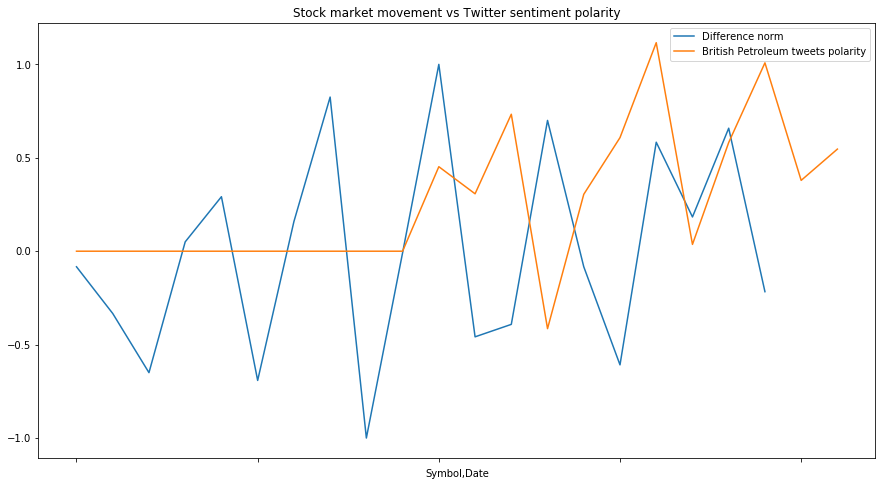

In [103]:
ax = bp['Difference norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter sentiment polarity')
ax.plot(bp_twt, label='British Petroleum tweets polarity')
ax.legend()

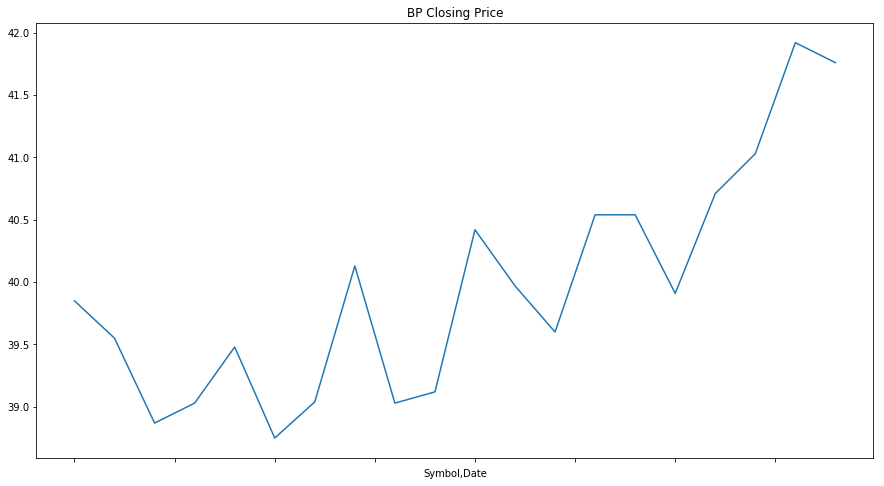

In [65]:
bp['Close'].plot(x='Date', figsize=(15,8), title='BP Closing Price')

In [91]:
gs = download_stocks('GS', start, end)
gs.head()

Close    High      Low    Open   Volume  Close difference  \
Symbol Date                                                                     
GS     2018-03-12  273.38  275.31  270.770  271.00  3065557              0.00   
       2018-03-13  268.53  275.03  267.440  274.34  2288103             -4.85   
       2018-03-14  264.43  270.78  263.911  270.40  2478684             -4.10   
       2018-03-15  266.61  269.00  265.350  265.72  2255191              2.18   
       2018-03-16  267.60  269.85  265.330  266.01  4114368              0.99   

                   Difference norm  
Symbol Date                         
GS     2018-03-12        -0.019608  
       2018-03-13        -0.533651  
       2018-03-14        -0.454160  
       2018-03-15         0.211447  
       2018-03-16         0.085321

In [104]:
gs_twt = twt.iloc[2].values[1:][::-1]
gs_twt = remove_weekends(gs_twt)
gs_twt

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.059558019999999996, 0.168730675, 0.8607954550000001, 0.0,
       0.34744267999999995, 0.074585639999999995, 0.55654121999999995,
       -0.0027418150000000003, 0.31690086499999998, 0.62308026500000002,
       0.028168215000000003, 0.24141368999999999], dtype=object)

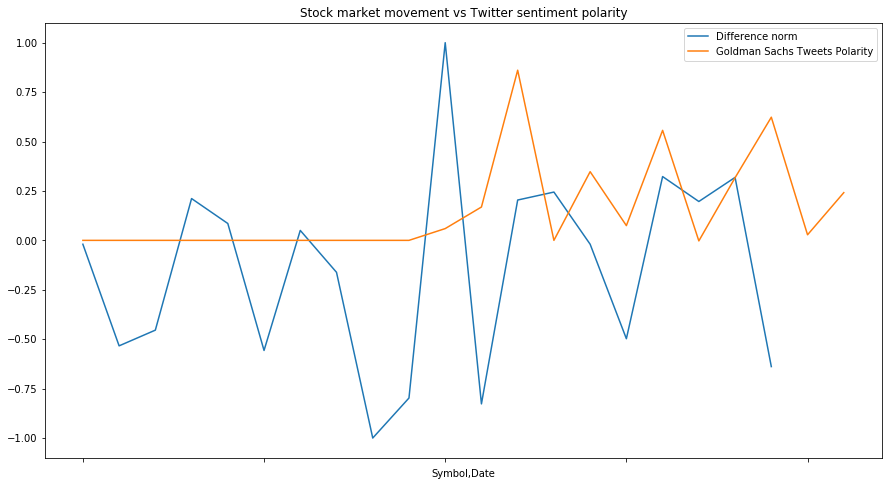

In [105]:
ax = gs['Difference norm'].plot(x='Date', figsize=(15,8), title='Stock market movement vs Twitter sentiment polarity')
ax.plot(gs_twt, label='Goldman Sachs Tweets Polarity')
ax.legend()

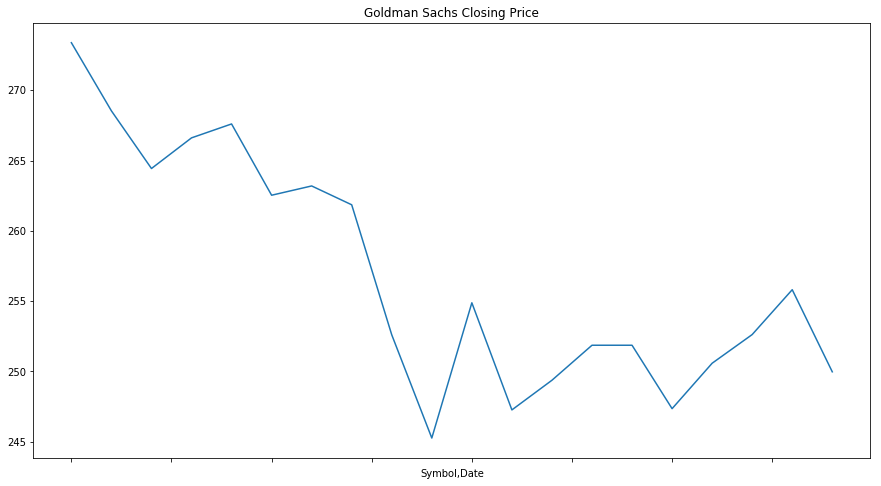

In [71]:
gs['Close'].plot(x='Date', figsize=(15,8), title='Goldman Sachs Closing Price')